IMPORT THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm
from scipy.stats import norm
import scipy
import random
import matplotlib.pyplot as plt

PLOT MIXTURE DISCRETE UNIFORM SAMPLE 

In [ ]:
p1,p2,n=0.2,0.2,100
init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
zeroes=init.count('0')
ones=init.count('1')
rs=init.count('r')

r=list(np.random.randint(low = 0,high=11,size=100))
r+=[0]*zeroes
r+=[1]*ones

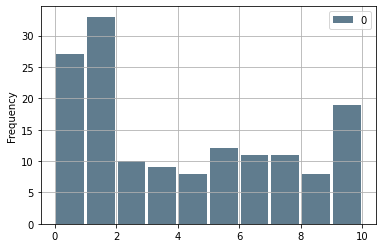

In [ ]:
pd.DataFrame(r).plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')

PLOT MIXTURE EXPONENTIAL SAMPLE

In [ ]:
p1,p2,n=0.2,0.2,100
init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
zeroes=init.count('0')
ones=init.count('1')
rs=init.count('r')

r=list(scipy.stats.gamma.rvs(a=1,scale=5,size=rs))
r+=[0]*zeroes
r+=[1]*ones

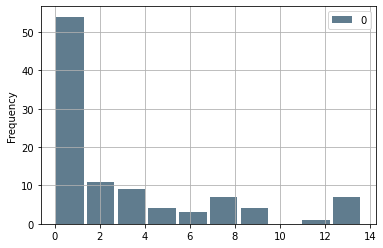

In [ ]:
pd.DataFrame(r).plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')

DEFINE THE NORMAL APPROXIMATION FUNCTION FOR GAMMA DISTRIBUTION

In [ ]:
def gamma_na(shape,scale,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=shape*scale
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(scipy.stats.gamma.rvs(a=shape,scale=scale,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones
    


    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)

    rbar=np.mean(r)
    s=np.std(r)


    ll=rbar-(1.96*s/np.sqrt(n))
    ul=rbar+(1.96*s/np.sqrt(n))

    length.append(ul-ll)
    

    if mu<ul and mu>ll:
      covered.append(1)
      

    else:
      
      covered.append(0)
    
  print('completed')

  return(np.mean(covered),np.mean(length))

DEFINE THE NORMAL APPROXIMATION FUNCTION FOR NORMAL DISTRIBUTION

In [ ]:
def norm_na(mu_,sigma,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=mu_
    
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    


    
    r=list(truncnorm.rvs(-mu,np.inf,loc=mu,scale=sigma,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones
    


    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)

    rbar=np.mean(r)
    s=np.std(r)


    ll=rbar-(1.96*s/np.sqrt(n))
    ul=rbar+(1.96*s/np.sqrt(n))

    length.append(ul-ll)
    

    if mu<ul and mu>ll:
      covered.append(1)
     

    else:
     
      covered.append(0)
  print('completed')

  return(np.mean(covered),np.mean(length))



DEFINE THE EL FUNCTION FOR NORMAL AND GAMMA DISTRIBUTIONS

In [ ]:
def norm_cov(mu_,sigma,n,p1,p2):
  np.random.seed(12)
  covered=[]
  length=[]
  for i in range(10000):
    
    mu=mu_
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    
    



    r=list(truncnorm.rvs(-mu,np.inf,loc=mu,scale=sigma,size=rs))
    
    r+=([0]*zeroes)
    r+=[1]*ones
    


    r=np.array(r)
    

    mu=p2+((1-(p1+p2))*mu_)



    f = lambda l : sum((r-mu)/(1+(l*(r-mu))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    
    

    ideal_p=(1/n)*(1/(1+(l*(r-mu))))
    w=sum(np.log(n*ideal_p))

    
  

    if -2*w<3.841:
      covered.append(1)
      

    else:
      covered.append(0)



    


    
    


    

  return(np.mean(covered),'?')

In [ ]:
def gamma_cov(shape,scale,n,p1,p2):
  np.random.seed(12)
  covered=[]
  length=[]
  for i in range(10000):
    mu=shape*scale
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(scipy.stats.gamma.rvs(a=shape,scale=scale,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones
    


    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)


    f = lambda l : sum((r-mu)/(1+(l*(r-mu))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    ideal_p=(1/n)*(1/(1+(l*(r-mu))))
    w=sum(np.log(n*ideal_p))
    
    length.append(-2*w)
    if -2*w<3.841:
      covered.append(1)

    else:
      
      covered.append(0)
    

  return(np.mean(covered),'?')

DEFINE THE AEL FUNCTION for NORMAL AND GAMMA DISTRIBUTIONS

In [ ]:
def norm_cov_adj(mu_,sigma,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=mu_
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(truncnorm.rvs(-mu,np.inf,loc=mu,scale=sigma,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones
    


    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)

    g=r-mu
    gbar=np.mean(g)
    gextra=(-np.log(n))*gbar/(2*n)
    g=list(g)
    g.append(gextra)
    g=np.array(g)



    f = lambda l : sum((g)/(1+(l*(g))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    ideal_p=(1/(n+1))*(1/(1+(l*(g))))
    w=sum(np.log((n+1)*ideal_p))

    length.append(-2*w)
    if -2*w<3.841:
      covered.append(1)

    else:
      
      covered.append(0)
    

  return(np.mean(covered),'?')

In [ ]:
def gamma_cov_adj(shape,scale,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=shape*scale
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(scipy.stats.gamma.rvs(a=shape,scale=scale,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones
    


    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)

    g=r-mu
    gbar=np.mean(g)
    gextra=(-np.log(n))*gbar/(2*n)
    g=list(g)
    g.append(gextra)
    g=np.array(g)



    f = lambda l : sum((g)/(1+(l*(g))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    ideal_p=(1/(n+1))*(1/(1+(l*(g))))
    w=sum(np.log((n+1)*ideal_p))
    length.append(-2*w)
    if -2*w<3.841:
      covered.append(1)

    else:
      
      covered.append(0)

  return(np.mean(covered),'?')

TRANSFORMED EL FUNCTION FOR NORMAL AND GAMMA DISTRIBUTIONS

In [ ]:
def norm_cov_tr(mu_,sigma,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=mu_
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(truncnorm.rvs(-mu,np.inf,loc=mu,scale=sigma,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones



    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)


    f = lambda l : sum((r-mu)/(1+(l*(r-mu))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    ideal_p=(1/n)*(1/(1+(l*(r-mu))))
    w=sum(np.log(n*ideal_p))
    if w<=n/2:
      comp=w*(1-(w/n))
    else:
      comp=w/2

    w=comp
    
    if -2*w<3.841:
     
      covered.append(1)
      length.append(-2*w)

    else:
      
      covered.append(0)
    

  return(np.mean(covered),'?')

In [ ]:
def gamma_cov_tr(shape,scale,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=shape*scale
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(scipy.stats.gamma.rvs(a=shape,scale=scale,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones
    


    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)


    f = lambda l : sum((r-mu)/(1+(l*(r-mu))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    ideal_p=(1/n)*(1/(1+(l*(r-mu))))
    w=sum(np.log(n*ideal_p))
    if w<=n/2:
      comp=w*(1-(w/n))
    else:
      comp=w/2

    w=comp
    
    length.append(-2*w)
    if -2*w<3.841:
      covered.append(1)

    else:
      covered.append(0)

  return(np.mean(covered),'?')

DEFINE TRANSFORMED ADJUSTED EL FOR NORMAL AND GAMMA DISTRIBUTIONS

In [ ]:
def norm_cov_tr_adj(mu_,sigma,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=mu_
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(truncnorm.rvs(-mu,np.inf,loc=mu,scale=sigma,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones
    


    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)

    g=r-mu
    gbar=np.mean(g)
    gextra=(-np.log(n))*gbar/(2*n)
    g=list(g)
    g.append(gextra)
    g=np.array(g)



    f = lambda l : sum((g)/(1+(l*(g))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    ideal_p=(1/(n+1))*(1/(1+(l*(g))))
    w=sum(np.log((n+1)*ideal_p))

    if w<=n/2:
      comp=w*(1-(w/n))
    else:
      comp=w/2

    w=comp


   
    length.append(-2*w)
    if -2*w<3.841:
      covered.append(1)

    else:
      covered.append(0)

  return(np.mean(covered),'?')

In [ ]:
def gamma_cov_tr_adj(shape,scale,n,p1,p2):
  covered=[]
  length=[]
  np.random.seed(12)
  for i in range(10000):
    mu=shape*scale
    init=list(np.random.choice([0,1,'r'],p=[p1,p2,1-(p1+p2)],size=n))
    zeroes=init.count('0')
    ones=init.count('1')
    rs=init.count('r')
    



    r=list(scipy.stats.gamma.rvs(a=shape,scale=scale,size=rs))
    r+=[0]*zeroes
    r+=[1]*ones



    r=np.array(r)

    mu=p2+((1-(p1+p2))*mu)

    g=r-mu
    gbar=np.mean(g)
    gextra=(-np.log(n))*gbar/(2*n)
    g=list(g)
    g.append(gextra)
    g=np.array(g)



    f = lambda l : sum((g)/(1+(l*(g))))
    l=[0]
    l=scipy.optimize.fsolve(f,l)[0]
    ideal_p=(1/(n+1))*(1/(1+(l*(g))))
    w=sum(np.log((n+1)*ideal_p))

    if w<=n/2:
      comp=w*(1-(w/n))
    else:
      comp=w/2

    w=comp


 
    length.append(-2*w)
    if -2*w<3.841:
      covered.append(1)

    else:
      covered.append(0)

  return(np.mean(covered),'?')

RUN THE SIMULATIONS OVER DIFFERENT PARAMETERS

In [ ]:
combns=[[0,0],[0.1,0.1],[0.2,0.1],[0.1,0.2],[0.2,0.2],[0.2,0.3],[0.3,0.2],[0.4,0.1],[0.1,0.4],[0.4,0.2],[0.2,0.4],[0.5,0.3],[0.3,0.5]]
ns=[15,25,50,100]
nvals,p1vals,p2vals,coverages,lengths=[],[],[],[],[]

counter=0

for n in ns:
  for c in combns:
    p1,p2=c[0],c[1]
    coverage,length=gamma_cov_tr_adj(2,1,n,p1,p2) #CHANGE THE FUNCTION HERE TO RUN SIMULATIONS FOR A PARTICULAR DISTRIBUTION AND PARTICULAR METHOD
    nvals.append(n)
    p1vals.append(p1)
    p2vals.append(p2)
    coverages.append(coverage)
    lengths.append(length)
    counter+=1
    print(int(counter*100/(len(ns)*len(combns))))  #PRINTS THE PERCENTAGE OF PROGRESS

df = pd.DataFrame(list(zip(nvals, p1vals,p2vals,coverages,lengths)),
               columns =['n', 'pi0','pi1','Coverage Probability','CI Length'])
df

1
3
5
7
9
11


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


13
15
17
19
21
23
25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log


26
28
30
32
34
36
38
40
42
44
46
48
50
51


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


53
55
57
59
61
63
65
67
69
71
73
75
76
78
80
82
84
86
88
90
92
94
96
98
100


,n,pi0,pi1,Coverage Probability,CI Length
0,15,0.0,0.0,0.8924,?
1,15,0.1,0.1,0.9003,?
2,15,0.2,0.1,0.8950,?
3,15,0.1,0.2,0.8922,?
4,15,0.2,0.2,0.8890,?
5,15,0.2,0.3,0.8736,?
6,15,0.3,0.2,0.8799,?
7,15,0.4,0.1,0.8842,?
8,15,0.1,0.4,0.8633,?
9,15,0.4,0.2,0.8757,?
